In [9]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Loading dataset
games = pd.read_csv("/content/drive/MyDrive/ML_Projects/Board_Game_Review_Prediction/games.csv")

In [11]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [12]:
#Shape of dataset
games.shape

(81312, 20)

In [13]:
#Columns of dataset
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

In [15]:
#Statitstical summary of dataset
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [16]:
#Checking missing values in dataset
games.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [17]:
#Displays total number of unique values in each columns
games.nunique()

id                      79463
type                        2
name                    76035
yearpublished             323
minplayers                 24
maxplayers                 89
playingtime               134
minplaytime               123
maxplaytime               134
minage                     35
users_rated              2147
average_rating          17564
bayes_average_rating    12681
total_owners             2995
total_traders             407
total_wanters             540
total_wishers            1130
total_comments           1216
total_weights             657
average_weight           3376
dtype: int64

In [18]:
games['type'].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

#### EDA

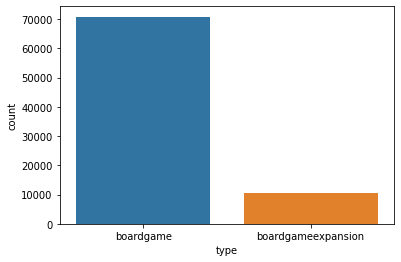

In [19]:
sns.countplot(games['type'])

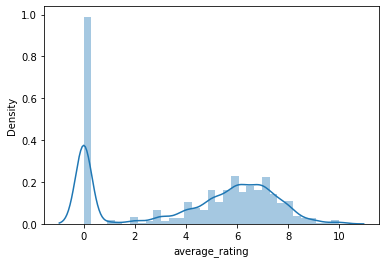

In [20]:
sns.distplot(games['average_rating'])

(array([24380.,     0., 11306.,     0.,  6089.,     0.,  3970.,     0.,
         2818.,  2219.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

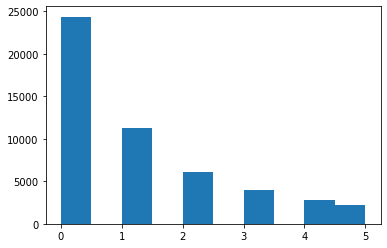

In [24]:
plt.hist(games['users_rated'],range = (0,5))

 * From the above plot we can say that board games have more number zero user rated.

#### Feature Engineering

In [25]:
#Let's see the average rating of board games which are not rated by any of the users.
games[games['users_rated'] == 0]['average_rating'].describe()

count    24380.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: average_rating, dtype: float64

* We can see that 24380 board games are not rated by any of the users.
* So we will drop the rows with users_rated = 0.

In [29]:
games[(games['maxplayers'] == 0) | (games['maxplaytime'] == 0)]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
657,160902,boardgame,Dungeons & Dragons Dice Masters: Battle for Faern,2015.0,2.0,2.0,0.0,60.0,0.0,14.0,621,7.82241,6.57014,1941,85,73,185,150,45,2.0889
929,153016,boardgame,Telestrations: 12 Player Party Pack,2011.0,4.0,12.0,0.0,0.0,0.0,12.0,413,7.88981,6.37987,966,6,54,131,80,14,1.0000
1211,37301,boardgame,Decktet,2008.0,0.0,0.0,30.0,30.0,30.0,0.0,366,7.58172,6.22832,1157,42,46,225,256,29,1.9655
1342,52328,boardgame,Malifaux,2009.0,2.0,2.0,0.0,0.0,0.0,0.0,338,7.66586,6.16904,680,22,25,78,104,36,3.2500
1516,29285,boardgame,Case Blue,2007.0,1.0,2.0,0.0,0.0,0.0,12.0,224,8.26528,6.09953,572,3,116,323,113,66,4.5758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81294,184349,boardgame,"The Luzon Campaign, 1945",2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81299,184368,boardgame,Bone Head,2015.0,2.0,9.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,60.0,0.0,18.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


* There are 20675 such cases where at least one of ['maxplayers', 'maxplaytime'] is 0.


In [31]:
#Let's count the number of rows where 'minplayers' > 'maxplayers'
games[games['minplayers'] > games['maxplayers']].count()

id                      4020
type                    4020
name                    4019
yearpublished           4020
minplayers              4020
maxplayers              4020
playingtime             4020
minplaytime             4020
maxplaytime             4020
minage                  4020
users_rated             4020
average_rating          4020
bayes_average_rating    4020
total_owners            4020
total_traders           4020
total_wanters           4020
total_wishers           4020
total_comments          4020
total_weights           4020
average_weight          4020
dtype: int64

* There are 4020 cases where 'minplayers' > 'maxplayers'

In [32]:
#Let's count the number of rows where 'minplaytime' > 'maxplaytime'
games[games['minplaytime'] > games['maxplaytime']].count()

id                      600
type                    600
name                    600
yearpublished           600
minplayers              600
maxplayers              600
playingtime             600
minplaytime             600
maxplaytime             600
minage                  600
users_rated             600
average_rating          600
bayes_average_rating    600
total_owners            600
total_traders           600
total_wanters           600
total_wishers           600
total_comments          600
total_weights           600
average_weight          600
dtype: int64

* There are 600 cases where 'minplaytime' > 'maxplaytime'

In [33]:
#Now we drop rows with missing values
games = games.dropna(axis = 0)

In [34]:
games.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [35]:
#Now we drop the column which is not none of use.
games.drop(['id', 'type', 'name', 'bayes_average_rating'], axis = 1, inplace = True)

In [36]:
#Dropping rows where users_rated = 0
games.drop(games[games['users_rated'] == 0].index, inplace = True)

In [37]:
#Now swapping rows with 'minplayers' > 'maxplayers' and 'minplaytime' > 'maxplaytime'
a = (games['minplayers'] > games['maxplayers'])
games.loc[a, ['minplayers',  'maxplayers']] = games.loc[a, ['maxplayers', 'minplayers']].values

In [38]:
b = (games['minplaytime'] > games['maxplaytime'])
games.loc[a, ['minplaytime',  'maxplaytime']] = games.loc[a, ['maxplaytime', 'minplaytime']].values

In [39]:
games.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


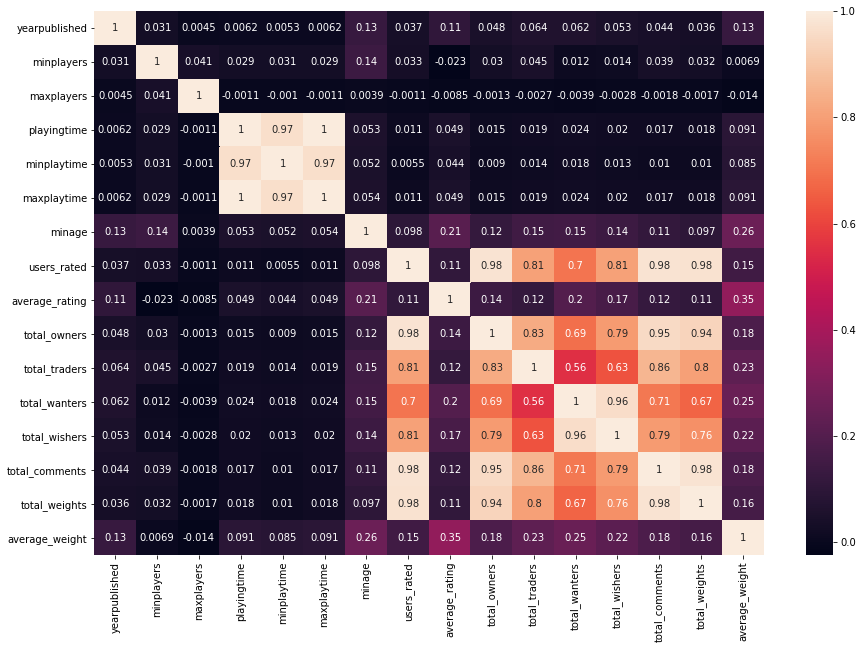

In [43]:
#Let's see the correlation between features of datasets
corr_mat = games.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_mat, annot = True)

 - From the above correlation plot we can say that, 'playingtime', 'minplaytime' and 'maxplaytime' have good correlation among themselves which is expected as each of these features are related to the playing time of a board game.
 - ‘total_owners’, ‘total_traders’, ‘total_wanters’, ‘total_wishers’, ‘total_comments’ and ‘total_weights’ have good correlation among themselves which is expected as each of these features are directly proportional to demand value of a board game.

In [44]:
games.head(2)

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939


In [45]:
#Now splitting dataset into indepedant variable and dependant variable
X = games.drop('average_rating', axis = 1)
y = games['average_rating']

In [46]:
X.shape

(56894, 15)

In [47]:
y.shape

(56894,)

In [50]:
#splitting dataset into training set and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [51]:
print(x_train.shape, x_test.shape)

(39825, 15) (17069, 15)


In [52]:
print(y_train.shape, y_test.shape)

(39825,) (17069,)


In [55]:
#Scaling dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Create Regression Model

In [58]:
#create Regression Model
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [59]:
regressor.fit(x_train, y_train)
#predict the model
reg_prediction = regressor.predict(x_test)

In [61]:
#Let's check performance of the model
from sklearn.metrics import r2_score, mean_squared_error
scores = r2_score(y_test, reg_prediction)
scores

0.16232465908285543

In [62]:
mse = mean_squared_error(y_test, reg_prediction)
mse

2.0732987632938453

In [65]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
dt_prediction = dt_reg.predict(x_test)

In [68]:
print("Scores : ", r2_score(y_test, dt_prediction))
print("MeanSquareError : ", mean_squared_error(y_test, dt_prediction))

Scores :  -0.24766151812480874
MeanSquareError :  3.0880401465624


In [84]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators= 200,random_state= 42)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [85]:
forest_prediction = forest.predict(x_test)

In [86]:
print("Scores : ", r2_score(y_test, forest_prediction))
print("MeanSquareError : ", mean_squared_error(y_test, forest_prediction))

Scores :  0.32104440421520974
MeanSquareError :  1.6804574855108174


* The performance of Random Forest Regressor model is better than Linear Regresssion and Decision Tree Regression Model for the given dataset.

In [87]:
#Prediction on another data
prediction = forest.predict(games.iloc[[42,97]].drop('average_rating', 1))

In [88]:
prediction

array([7.9302693, 7.9302693])

* The actual ‘average_ratings’ of 42nd and 97th board games in data set are [7.9302693, 7.9302693].

In [90]:
#Actual average ratings
games.iloc[[42,97]]['average_rating']

42    7.86088
97    7.67833
Name: average_rating, dtype: float64

* The predicted ‘average_ratings’ are very close to the actual ‘average_ratings’.